# MNIST

In [18]:
# 패키지 불러오기
import sys, warnings
# sys.path.append("Y:\Python\Mega_IT")
warnings.filterwarnings('ignore')

# from yjk_module.preprocessing import *
# from yjk_module.ml_module import *
# from yjk_module.dl_module import *

import os
# os.chdir("Y:\Python\Mega_IT\H.Deep_Learning")
# os.getcwd()

# from hossam.util import *
# from hossam.plot import *
# from hossam.tensor import *
# from hossam.classification import *

import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback, History
from keras.utils import to_categorical
from keras.datasets.mnist import load_data

In [2]:
# MNIST 데이터 로드
(x_train, y_train), (x_test, y_test) = load_data()

In [3]:
# 특정 데이터의 픽셀 최대값과 최소값
print(np.max(x_train[1234]))
print(np.min(x_train[1234]))

255
0


In [4]:
# 종속변수 명칭
y_train[1234]

3

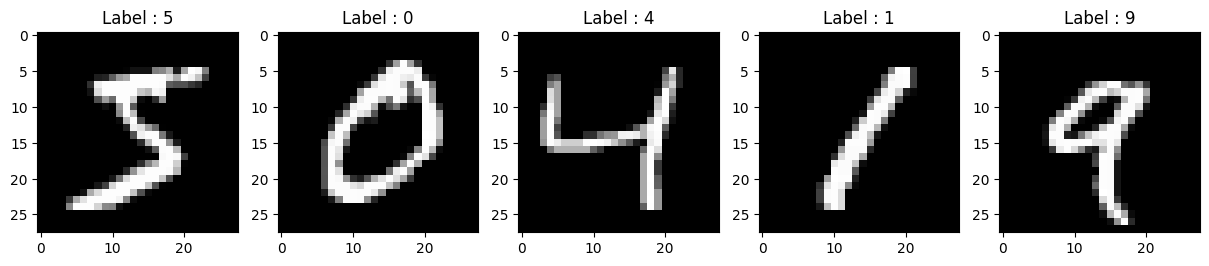

In [7]:
# 샘플 데이터 시각화
fig, ax = plt.subplots(1, 5, figsize = (15, 3))

for i in range(0, len(ax)):
    ax[i].imshow(x_train[i], cmap = 'gray')
    ax[i].set_title(f"Label : {y_train[i]}")

plt.show()

In [8]:
# 종속변수 원핫인코딩
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

In [9]:
# kh = YjkKerasHelper('c')

In [10]:
# 훈련데이터 스케일링
x_train_nm = x_train / 255
x_test_nm = x_test / 255

In [11]:
# 다층 레이어 모델 구성
model = Sequential([
    Flatten(),
    Dense(256, activation = 'relu', input_shape = (x_train_nm[0].shape[0] * x_train_nm[0].shape[1],)),
    Dropout(0.2),
    Dense(128, activation = 'relu'),
    Dropout(0.2),
    Dense(len(y_train_oh[0]), activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

2024-04-24 16:23:06.030090: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22433 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:08:00.0, compute capability: 8.6


In [13]:
# 모델 구성 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 23514

In [12]:
%%time

# 모델 훈련
history = model.fit(x_train_nm, y_train_oh, validation_data = (x_test_nm, y_test_oh), epochs = 1000, callbacks = [
    EarlyStopping(patience = 8, restore_best_weights = True)
])

Epoch 1/1000


2024-04-24 16:23:14.004472: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f79eeee92f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-24 16:23:14.004488: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-04-24 16:23:14.007705: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-24 16:23:14.017114: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
I0000 00:00:1713943394.067786   33685 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 5s 2ms/step - loss: 0.2558 - accuracy: 0.9230 - val_loss: 0.1206 - val_accuracy: 0.9632
Epoch 2/1000
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1234 - accuracy: 0.9621 - val_loss: 0.0869 - val_accuracy: 0.9719
Epoch 3/1000
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0917 - accuracy: 0.9721 - val_loss: 0.0809 - val_accuracy: 0.9741
Epoch 4/1000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0767 - accuracy: 0.9762 - val_loss: 0.0706 - val_accuracy: 0.9782
Epoch 5/1000
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0660 - accuracy: 0.9795 - val_loss: 0.0682 - val_accuracy: 0.9792
Epoch 6/1000
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0594 - accuracy: 0.9804 - val_loss: 0.0719 - val_accuracy: 0.9788
Epoch 7/1000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0506 - accuracy: 0.9839 - val_loss: 0.0762 - val_accuracy

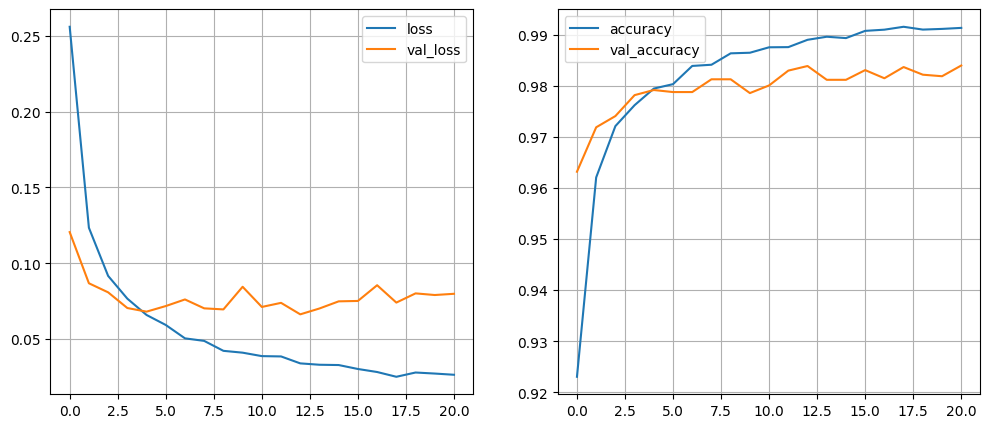

In [15]:
# 학습곡선 시각화
# yjk_dl_history_plot(history, metrics = 'accuracy')

hist_dict = history.history
fig, ax = plt.subplots(1, 2, figsize = (12, 5))

ax[0].plot(hist_dict['loss'], label = 'loss')
ax[0].plot(hist_dict['val_loss'], label = 'val_loss')
ax[0].grid()
ax[0].legend()

ax[1].plot(hist_dict['accuracy'], label = 'accuracy')
ax[1].plot(hist_dict['val_accuracy'], label = 'val_accuracy')
ax[1].grid()
ax[1].legend()

In [16]:
# 검증 데이터 예측
result = model.predict(x_test_nm)
arg_result = np.argmax(result, axis = -1)

313/313 [==============================] - 0s 699us/step


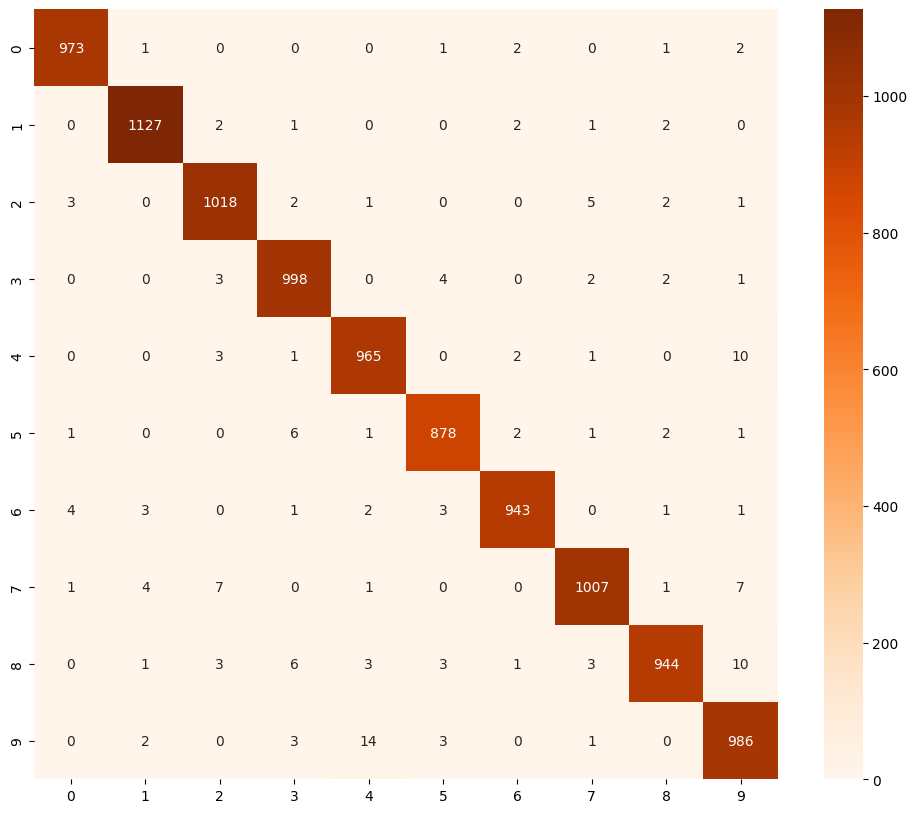

In [20]:
# 혼동 행렬 출력
c_mat = confusion_matrix(y_test, arg_result)

plt.figure(figsize = (12, 10))
sns.heatmap(c_mat, annot = True, fmt = 'd', cmap = 'Oranges')
plt.show()

- 이미지 로드 패키지 PIL

In [22]:
from PIL import Image

In [23]:
# 직접 쓴 글씨 이미지 로드
img2 = Image.open('./res/손글씨2.jpg')
img2

In [24]:
img3 = Image.open('./res/손글씨3.jpg')
img3

- Grayscale 변환 : RGB 3개의 채널에서 흑백 단일 1개의 채널로 변환되어 차원이 축소됨

In [25]:
img2_gray = img2.convert(mode = "L")
img2_gray

In [26]:
img3_gray = img3.convert(mode = "L")
img3_gray

In [27]:
img2_array = np.array(img2_gray)
img3_array = np.array(img3_gray)

img2_array.shape, img3_array.shape

((28, 28), (28, 28))

In [29]:
# 훈련 데이터와 동일한 기준으로 전처리 수행
myx = np.array([img2_array, img3_array])
myx_nm = myx / 255

In [30]:
# 손글씨 데이터 예측
my_pred = model.predict(myx_nm)
np.argmax(my_pred, axis = -1)

1/1 [==============================] - 0s 11ms/step


array([2, 3])